In [113]:
from IPython.display import Image
from IPython.core.display import HTML 
Image(url= "https://thenypost.files.wordpress.com/2018/10/beto-cruz-polls.jpg?quality=90&strip=all&w=618&h=410&crop=1")


## Introduction:

Tomorrow is election day and a lot of people - including me - are curious as to who is going to win Texas. To gain better insight into what people are thinking and who they favor, I decided to use Twitters API to get a random sample of 5000 tweets. In this notebook I will access Twitters GET statuses/sample API. Using the tweepy library and OAuth tokens to authenticate my credentials, I can then filter the stream for key words: "Beto", "Beto O'Rourke", "Ted Cruz", and "Cruz". Using a custom StreamListner class, the tweets will be stored into a file, "politics.txt". Afterwards, I will count up the frequencies of the keywords to see who is mentioned the most. 

## Workflow:

Using the tweepy library, I will access the API and store the tweets in a file. I will then store them in a pandas dataframe, where I can then do some analysis of the keywords. At the end, I will visualize my findings to better grasp the frequencies of the keywords. 

In [114]:
# import libraries
import tweepy, json

# input your authentication credentials
access_token = "1058146506975444993-A6AdRlmFWJAXasn07kQrzTQLfea0bz"
access_token_secret = "iVlLH9fBzXqDrrZpPrxni5YcDlq9hqvUbdQZN1EwaZLXo"
consumer_key = "KENcuXIfS0HJ9kpqEIeX4jeGJ"
consumer_secret = "x8Z92urBjrNk1dEjn94i45b3esUNiPltQFubfOj1vQYVUkm4JA"

# Pass OAuth details to tweepy's OAuth handler
auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)

In [115]:
# create StreamListener class object
class MyStreamListener(tweepy.StreamListener):
    def __init__(self, api=None):
        super(MyStreamListener, self).__init__()
        self.num_tweets = 0
        self.file = open("politics.txt", "w") # find 'tweets.txt'

    def on_status(self, status):
        tweet = status._json
        self.file.write( json.dumps(tweet) + '\n' )
        self.num_tweets += 1
        if self.num_tweets < 5000:
            return True
        else:
            return False
        self.file.close()

    def on_error(self, status):
        print(status)

# this class will save files into "tweet.txt" and stop at 5000 tweets

In [116]:
# Initialize Stream listener
listener = MyStreamListener()

# use tweepy.Stream(auth, listener)
# Create your Stream object with authentication
stream = tweepy.Stream(auth, listener)


# Filter Twitter Streams to capture data by the keywords:
# use 'track=[]'
stream.filter(track=["Beto", "Beto O\'Rourke", "Ted Cruz", "Cruz"])


In [119]:
import requests



# String of path to file: tweets_data_path
tweets_data_path = "politics.txt"

# Initialize empty list to store tweets: tweets_data
tweets_data = []

# Open connection to file
tweets_file = open(tweets_data_path, "r")

# Read in tweets and store in list: tweets_data
for line in tweets_file:
    tweet = json.loads(line)
    tweets_data.append(tweet)

# Close connection to file
tweets_file.close()

# Print the keys of the first tweet dict
print(tweets_data[0].keys())

dict_keys(['created_at', 'id', 'id_str', 'text', 'source', 'truncated', 'in_reply_to_status_id', 'in_reply_to_status_id_str', 'in_reply_to_user_id', 'in_reply_to_user_id_str', 'in_reply_to_screen_name', 'user', 'geo', 'coordinates', 'place', 'contributors', 'retweeted_status', 'quoted_status_id', 'quoted_status_id_str', 'quoted_status', 'quoted_status_permalink', 'is_quote_status', 'quote_count', 'reply_count', 'retweet_count', 'favorite_count', 'entities', 'favorited', 'retweeted', 'filter_level', 'lang', 'timestamp_ms'])


In [120]:
# import pandas
import pandas as pd

# store in dataframe
df = pd.DataFrame(tweets_data, columns = ["text", "lang", "created_at", "timestamp_ms"])
df.head()

,text,lang,created_at,timestamp_ms
0,RT @tedcruz: Hollywood liberals all in for Bet...,en,Mon Nov 05 23:09:22 +0000 2018,1541459362244
1,RT @chilenasa: Cáguense un rato de la Risa con...,es,Mon Nov 05 23:09:23 +0000 2018,1541459363106
2,RT @SethAbramson: RETWEET if you SUPPORT Democ...,en,Mon Nov 05 23:09:23 +0000 2018,1541459363090
3,RT @Chinohoven: Y’all got problems with politi...,en,Mon Nov 05 23:09:23 +0000 2018,1541459363432
4,RT @natalietbh: Jake Gyllenhaal just endorsed ...,en,Mon Nov 05 23:09:23 +0000 2018,1541459363476


In [121]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4999 entries, 0 to 4998
Data columns (total 4 columns):
text            4999 non-null object
lang            4999 non-null object
created_at      4999 non-null object
timestamp_ms    4999 non-null object
dtypes: object(4)
memory usage: 78.1+ KB


In [122]:
def word_in_text(word, text):
    word = word.lower()
    text = tweet.lower()
    match = re.search(word, text)

    if match:
        return True
    return False

In [123]:
# creating function to count how many times word appeards in text

# import re to search for keywords
import re

def word_in_text(word, text):
    word = word.lower()
    text = text.lower()
    match = re.search(word, text)
    
    if match:
        return True
    else:
        return False
# empty lists for each keyword
[Beto, beto_orourke, ted_cruz, Cruz] = [0, 0, 0, 0]

for i, v in df.iterrows():
    Beto += word_in_text("Beto", v["text"])
    beto_orourke += word_in_text("Beto O\'Rourke'", v["text"])
    ted_cruz += word_in_text("Ted Cruz", v["text"])
    Cruz += word_in_text("Cruz", v["text"])
    
beto, cruz = (Beto + beto_orourke), (ted_cruz + Cruz)
print("Beto's mentions in tweets ", beto)
print("Cruz' mentions in tweets ", cruz)

Beto's mentions in tweets  2567
Cruz' mentions in tweets  2451


## Findings:

- After combining the variables, Beto has a higher absolute frequency of word occurences in the random sample of tweets - 2,567.
- Cruz had an absolute frequency of 2,451

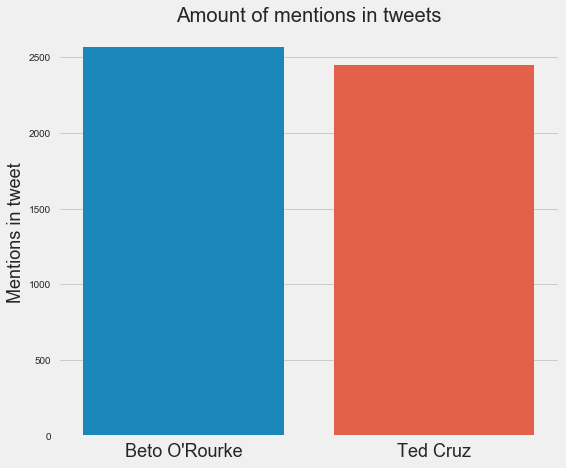

In [124]:
# Import packages
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


# Set seaborn style
sns.set(color_codes=True)

# Create a list of labels:cd
cd = ["Beto O\'Rourke", "Ted Cruz"]

# Plot histogram
plt.style.use('fivethirtyeight')
plt.figure(figsize=(8,7))
ax = sns.barplot(cd, [beto, cruz])
ax.set(ylabel='count')
plt.ylabel("Mentions in tweet",size=18)
plt.title("Amount of mentions in tweets")
plt.xticks(size=18)
plt.show()

## Conclusion:

After gathering the data and analyzing it, I see that Beto has more mentions on Twitter at the moment; but that doesnt necessarily mean he is more popular. In order to verify this I would need to find more data - polls, surveys, etc. Without more data, no definitive conclusions can be made. 

Nevertheless, the results do have some significance. At the moment - November 5, 2018 6:19 PM -  a lot of people are talking about both Beto and Cruz. And by the amount of mentions in the Twitter sample, its definitely going to be a close race. Both Beto and Cruz are mentioned a lot of times in the random sample. If there is one conclusion we can draw from this analysis, it is that this election is important to a lot of people and its definitely on the publics mind. Make you sure you go out and vote tomorrow!